In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:

df = pd.read_csv('amazon.csv')


In [9]:
print(df.isnull().sum())


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [10]:
df['rating_count'] = df['rating_count'].fillna(0)  # or use df['rating_count'].mean()


In [11]:
print(df.describe(include='all'))  # Get a summary of all columns


        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1465   
unique          449                  92     28         1144   
top            ₹999                 50%    4.1        

In [13]:
df.dtypes


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [14]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce') / 100
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


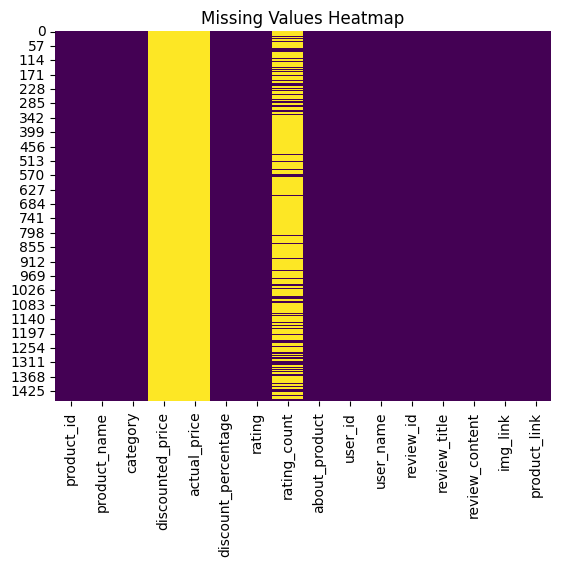

In [15]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


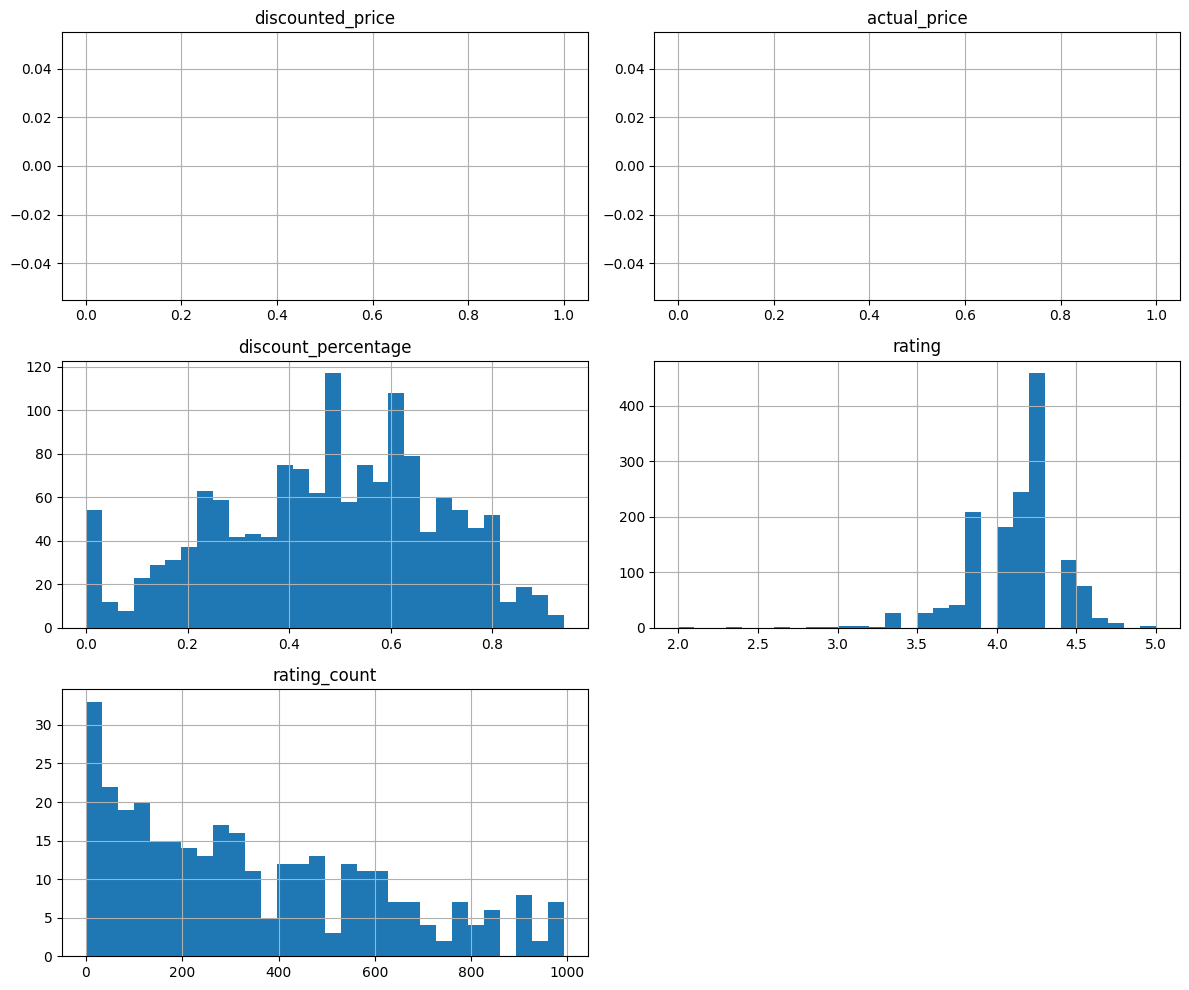

In [16]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


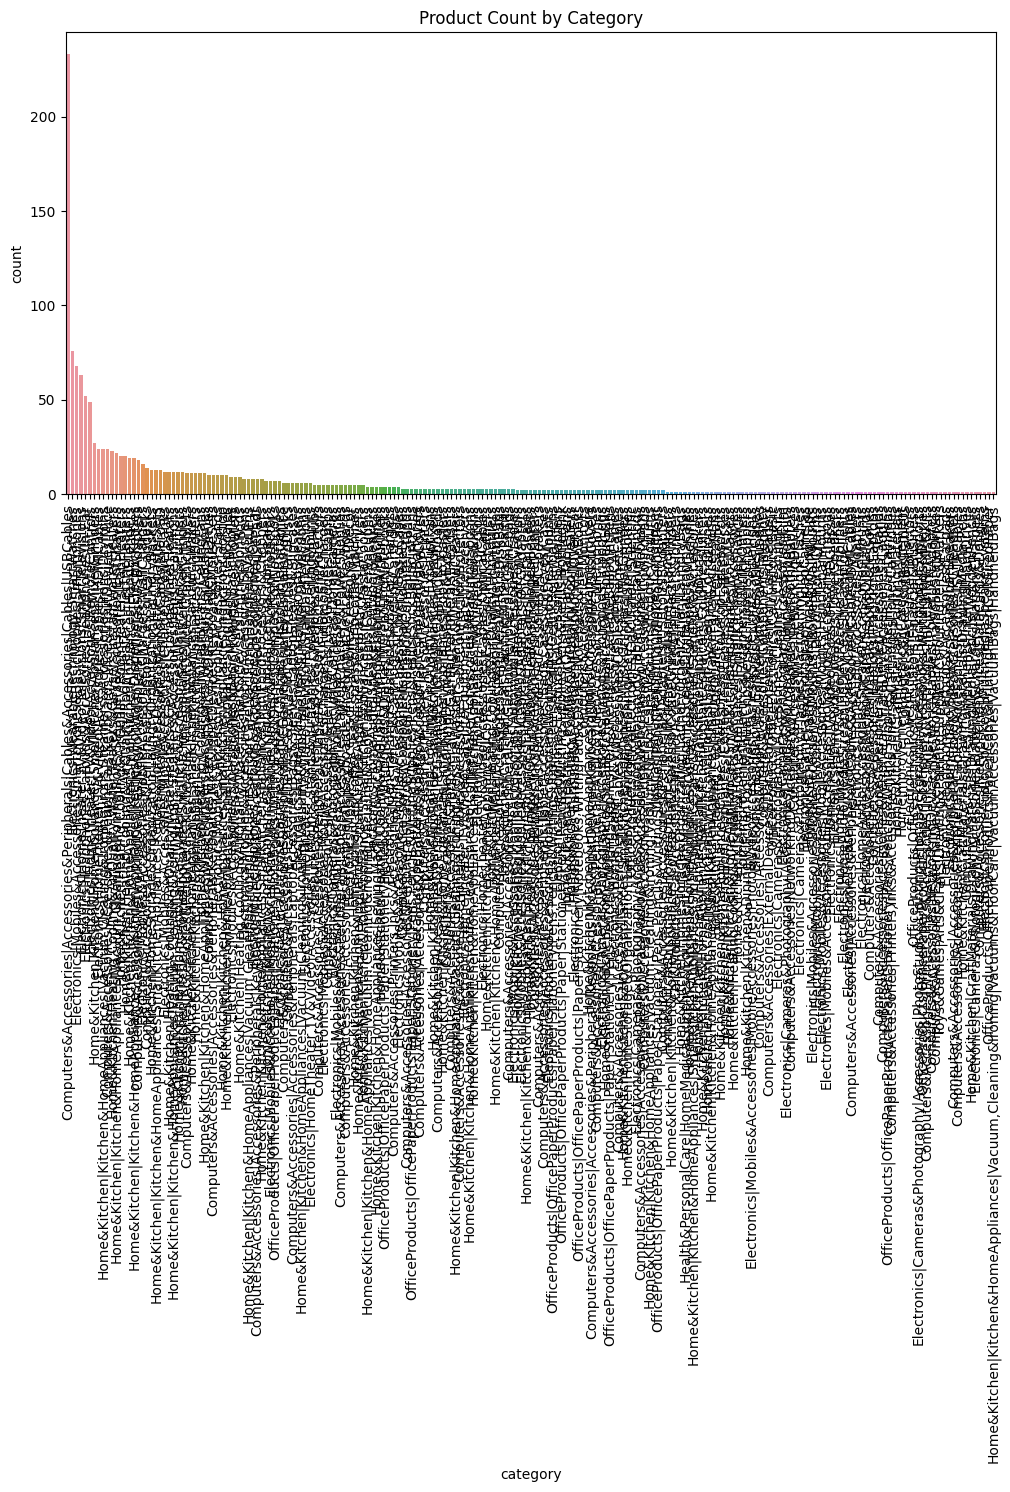

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Product Count by Category')
plt.show()


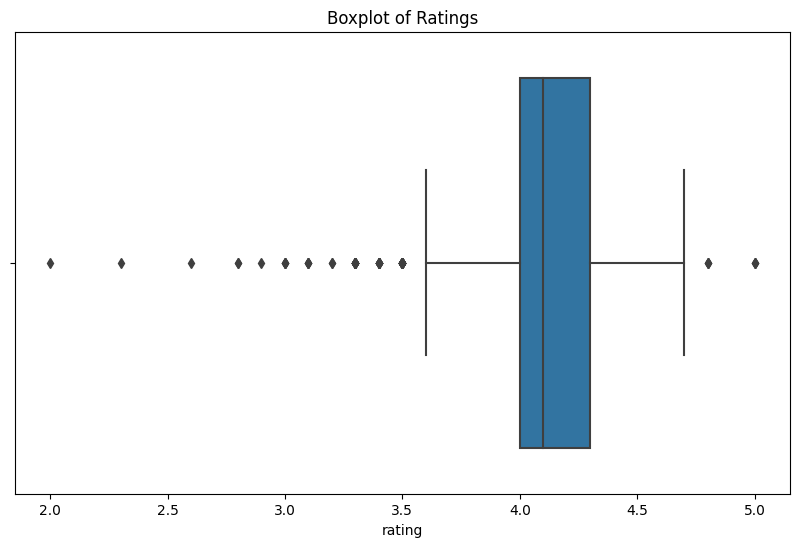

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5944\3011635052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


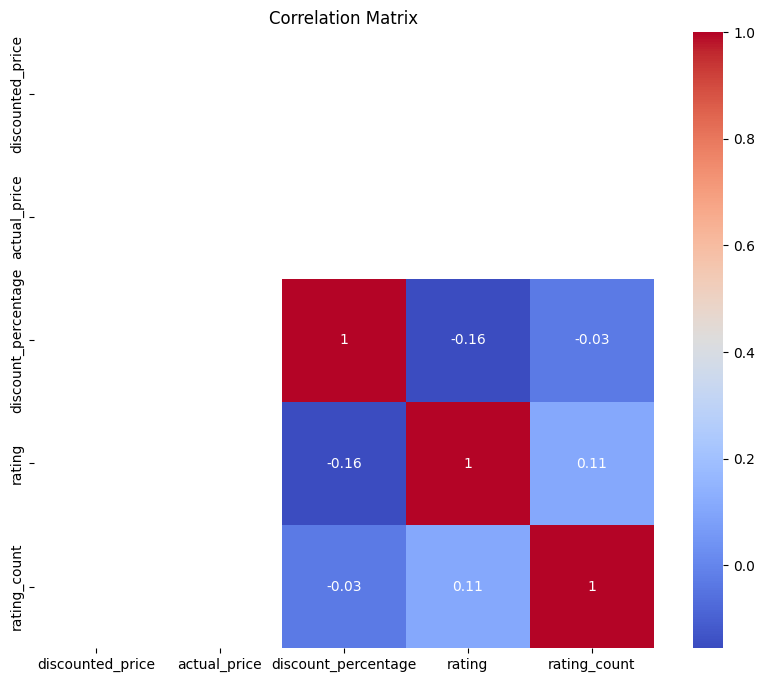

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [20]:
top_reviews = df[['review_title', 'review_content']].head(10)
print(top_reviews)


                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   
5  It's pretty good,Average quality,very good and...   
6  Long durable.,good,Does not charge Lenovo m8 t...   
7  Worth for money - suitable for Android auto,Go...   
8  Works on linux for me. Get the model with ante...   
9  A Good Braided Cable for Your Type C Device,Go...   

                                      review_content  
0  Looks durable Charging is fine tooNo complains...  
1  I ordered this cable to connect my phone to An...  
2  Not quite durable and sturdy,https://m.media-a...  
3  Good product,long wire,Charges good,Nice,I bou...  
4  Bought this instead of original apple, does th...  
5  It's a good product.,Like,Very good item stron... 

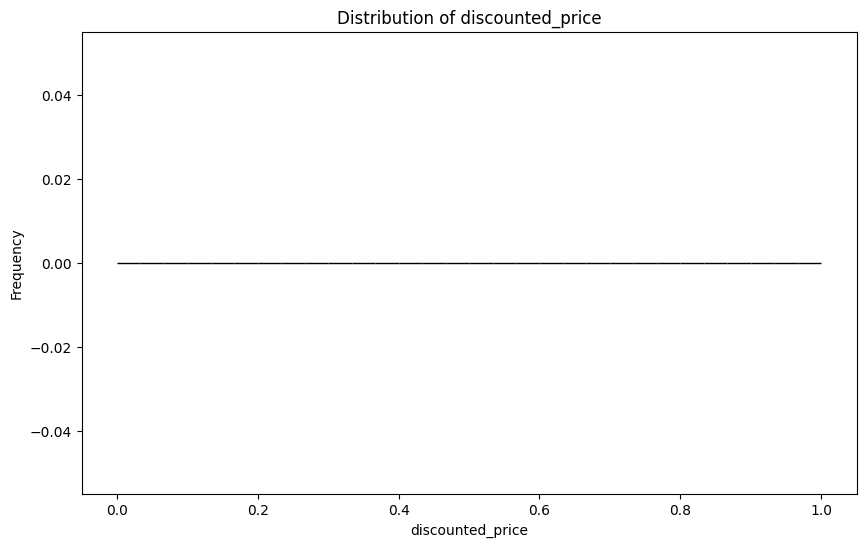

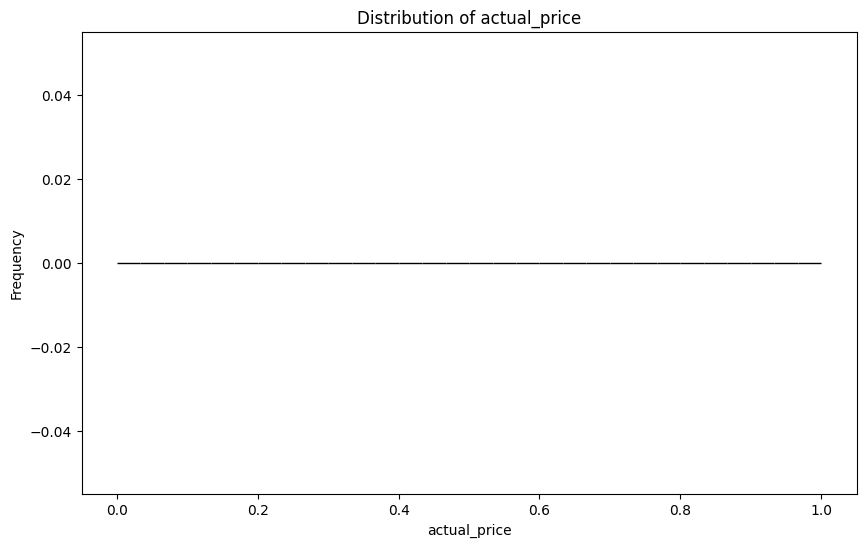

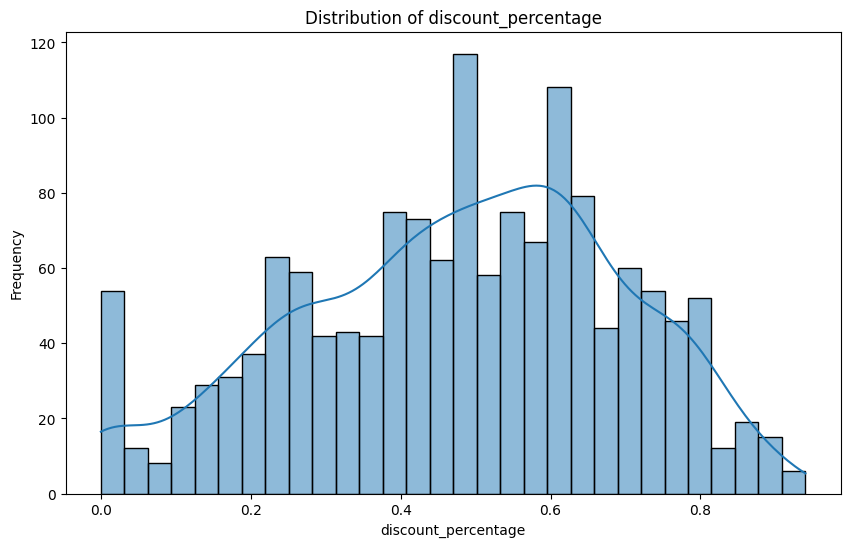

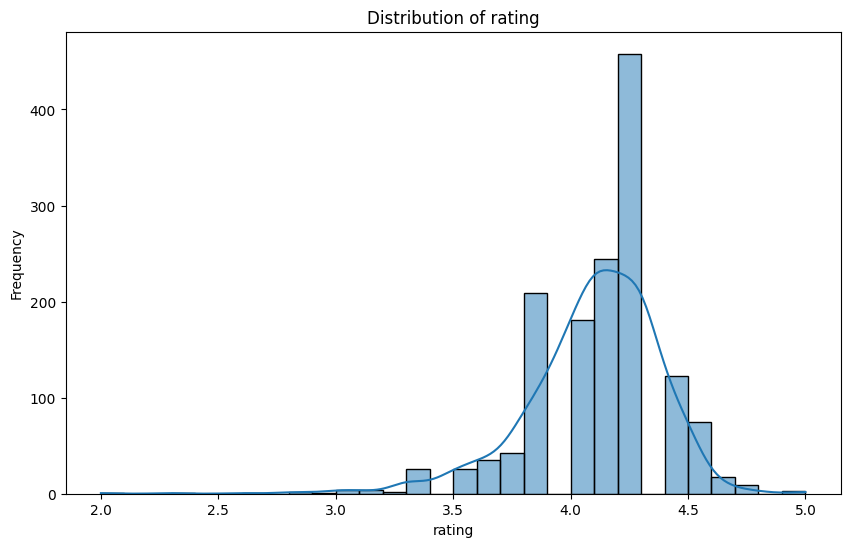

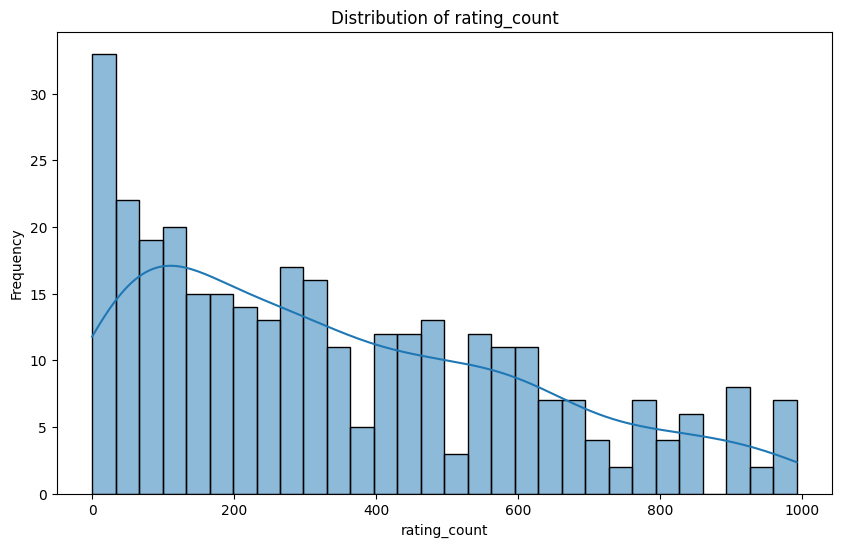

In [21]:
# Plotting distributions
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


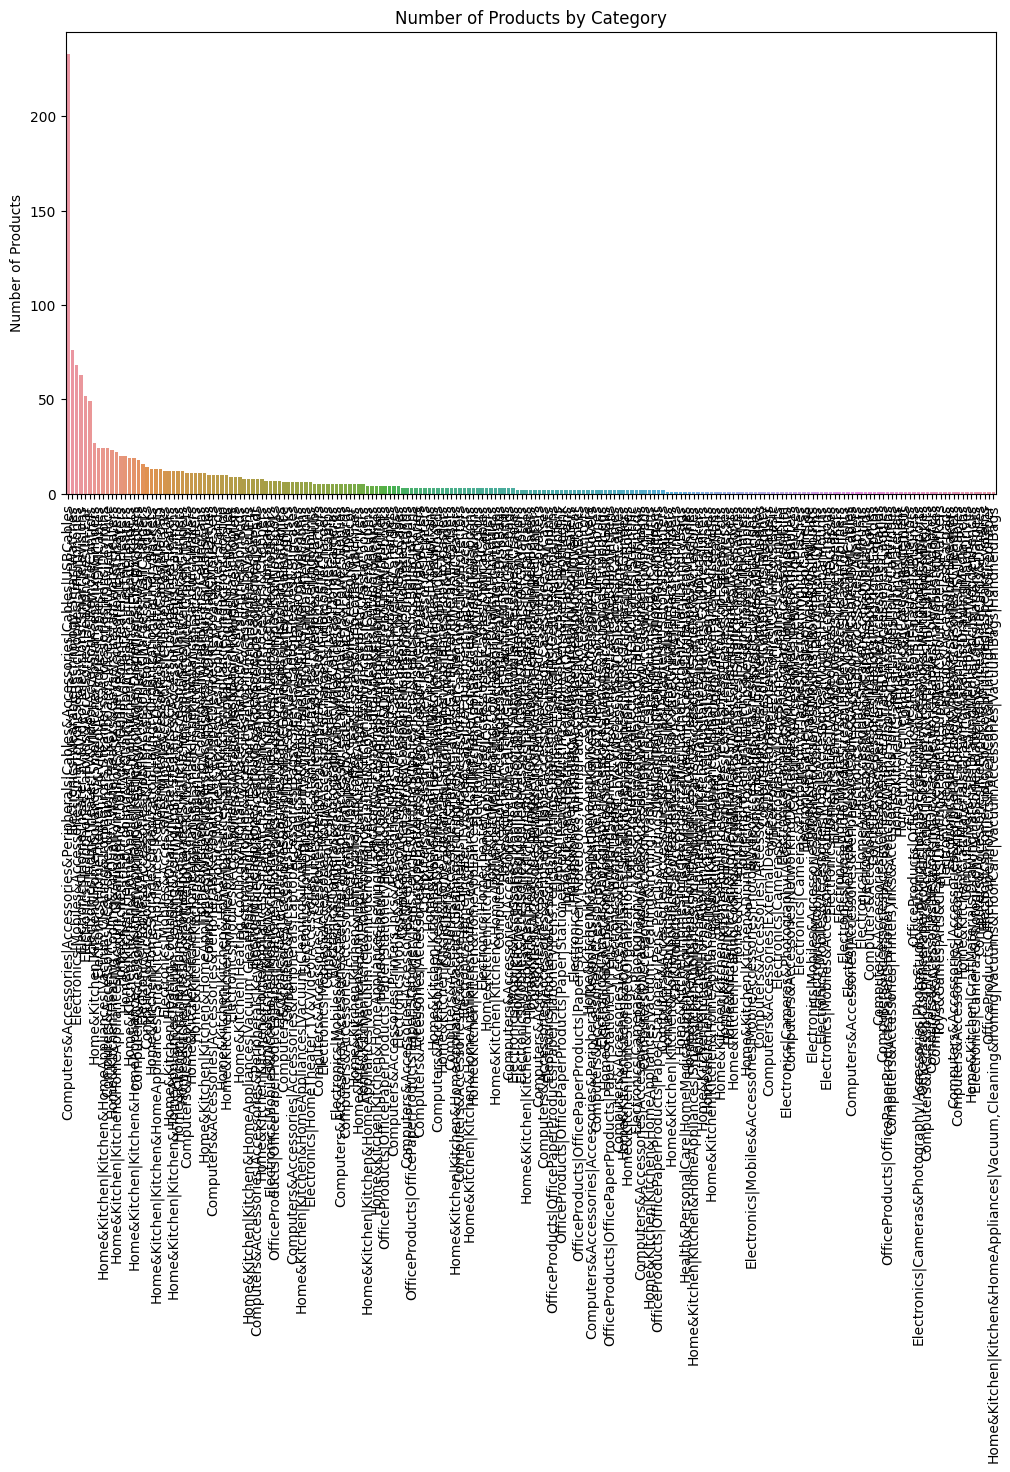

In [22]:
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Products by Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Products')
plt.show()


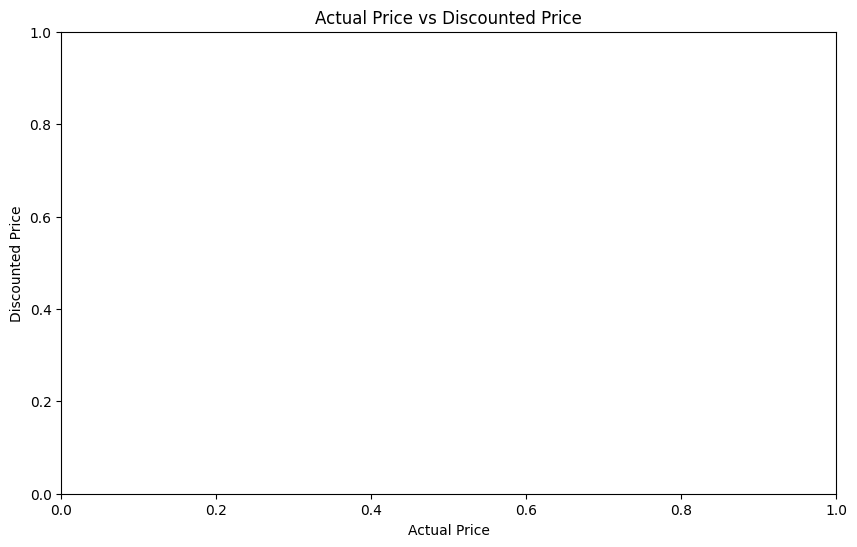

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.6)
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


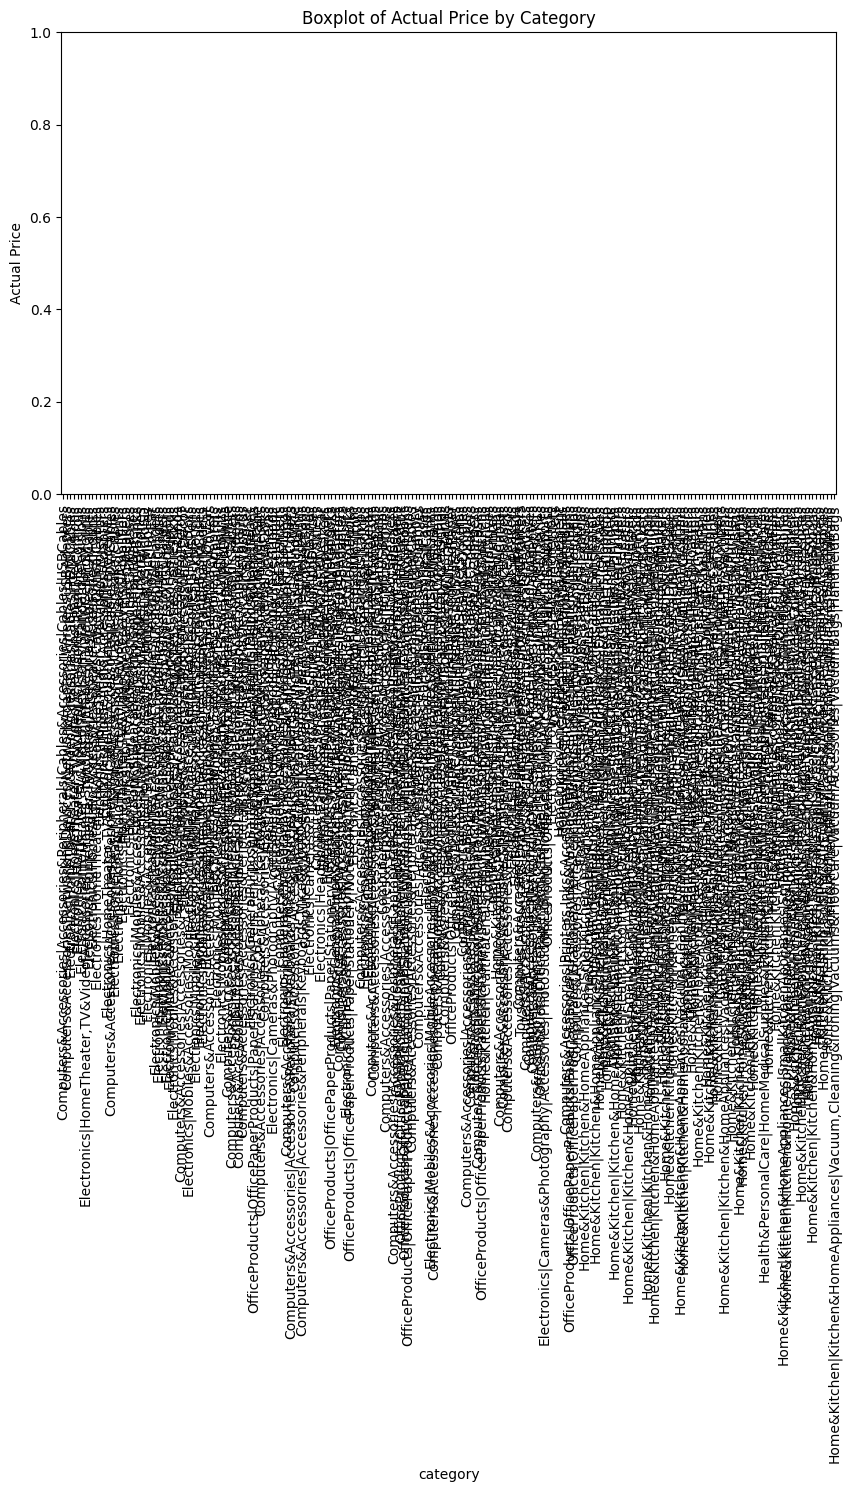

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='actual_price')
plt.title('Boxplot of Actual Price by Category')
plt.xticks(rotation=90)
plt.ylabel('Actual Price')
plt.show()


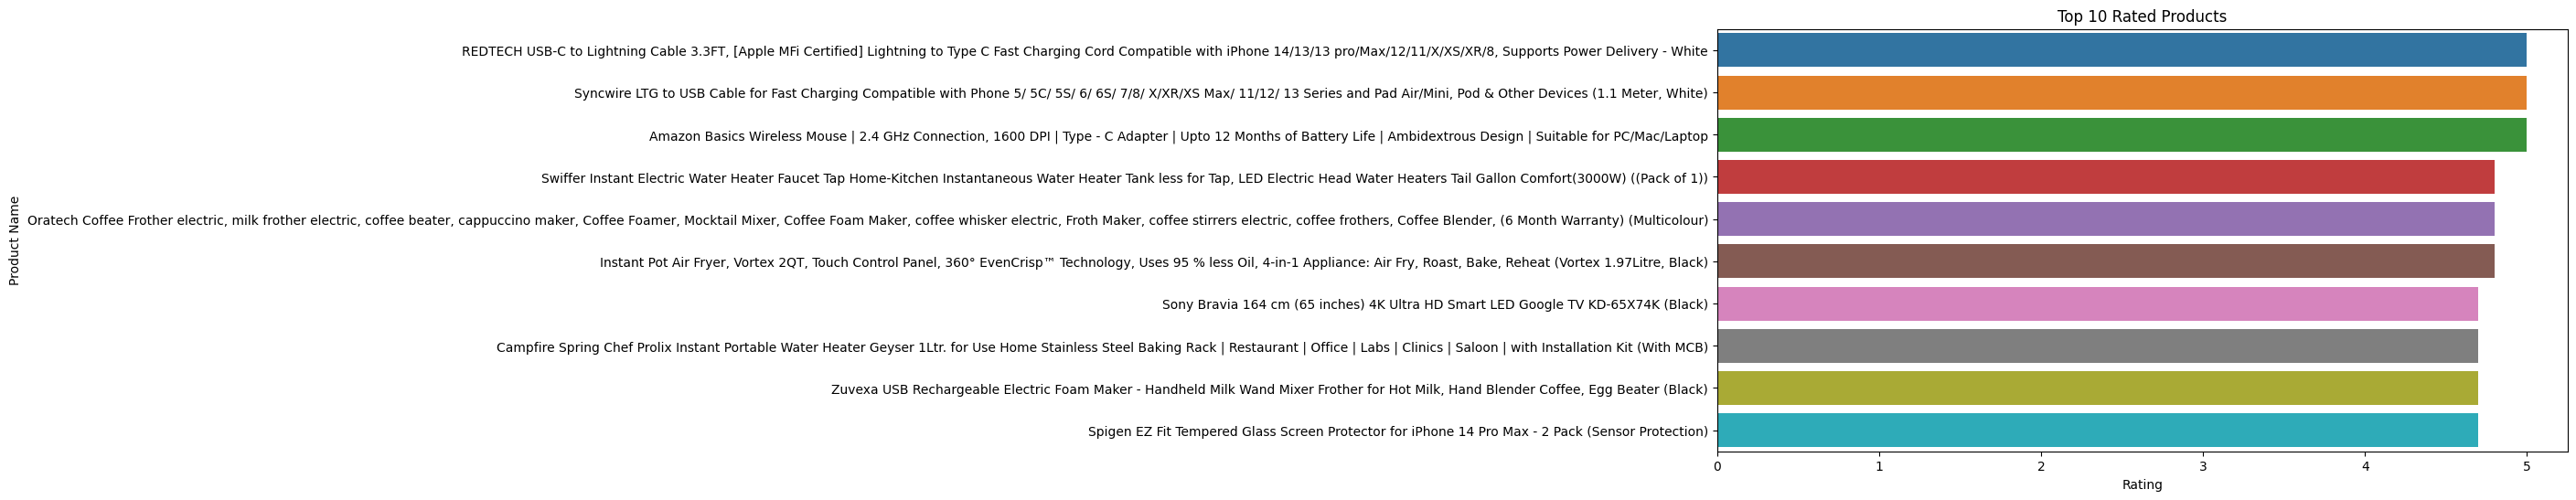

In [25]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='product_name', data=top_rated_products)
plt.title('Top 10 Rated Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5944\1375532592.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(rating_category.pivot('category', 'rating_count', 'rating_count'),


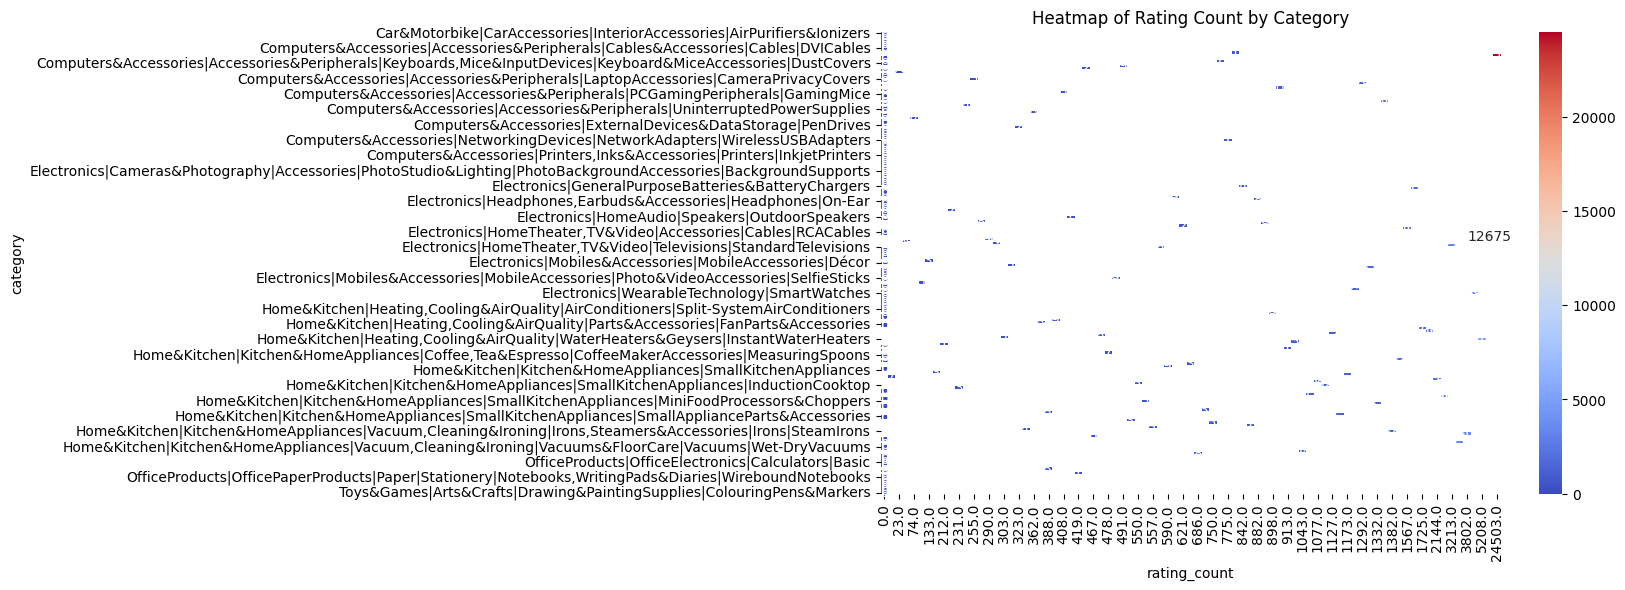

In [26]:
plt.figure(figsize=(10, 6))
rating_category = df.groupby('category')['rating_count'].sum().reset_index()
sns.heatmap(rating_category.pivot('category', 'rating_count', 'rating_count'),
            annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Rating Count by Category')
plt.show()


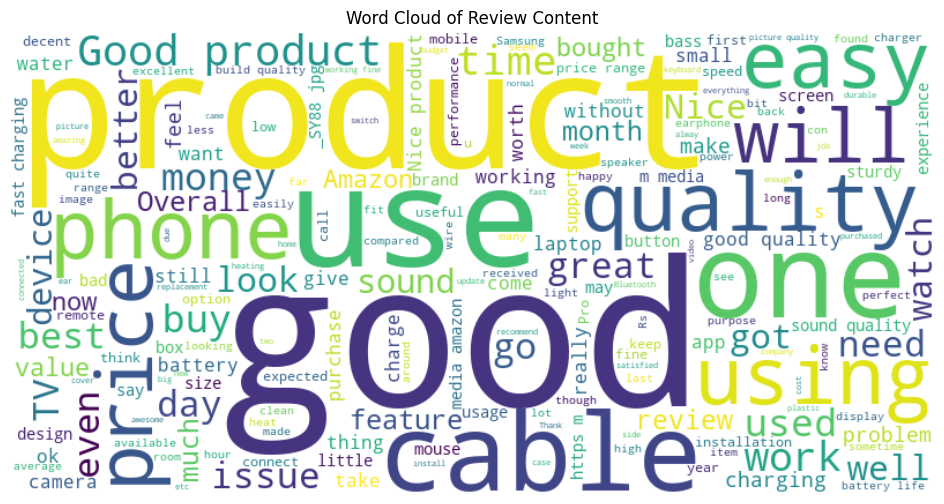

In [27]:
from wordcloud import WordCloud

all_reviews = ' '.join(df['review_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()


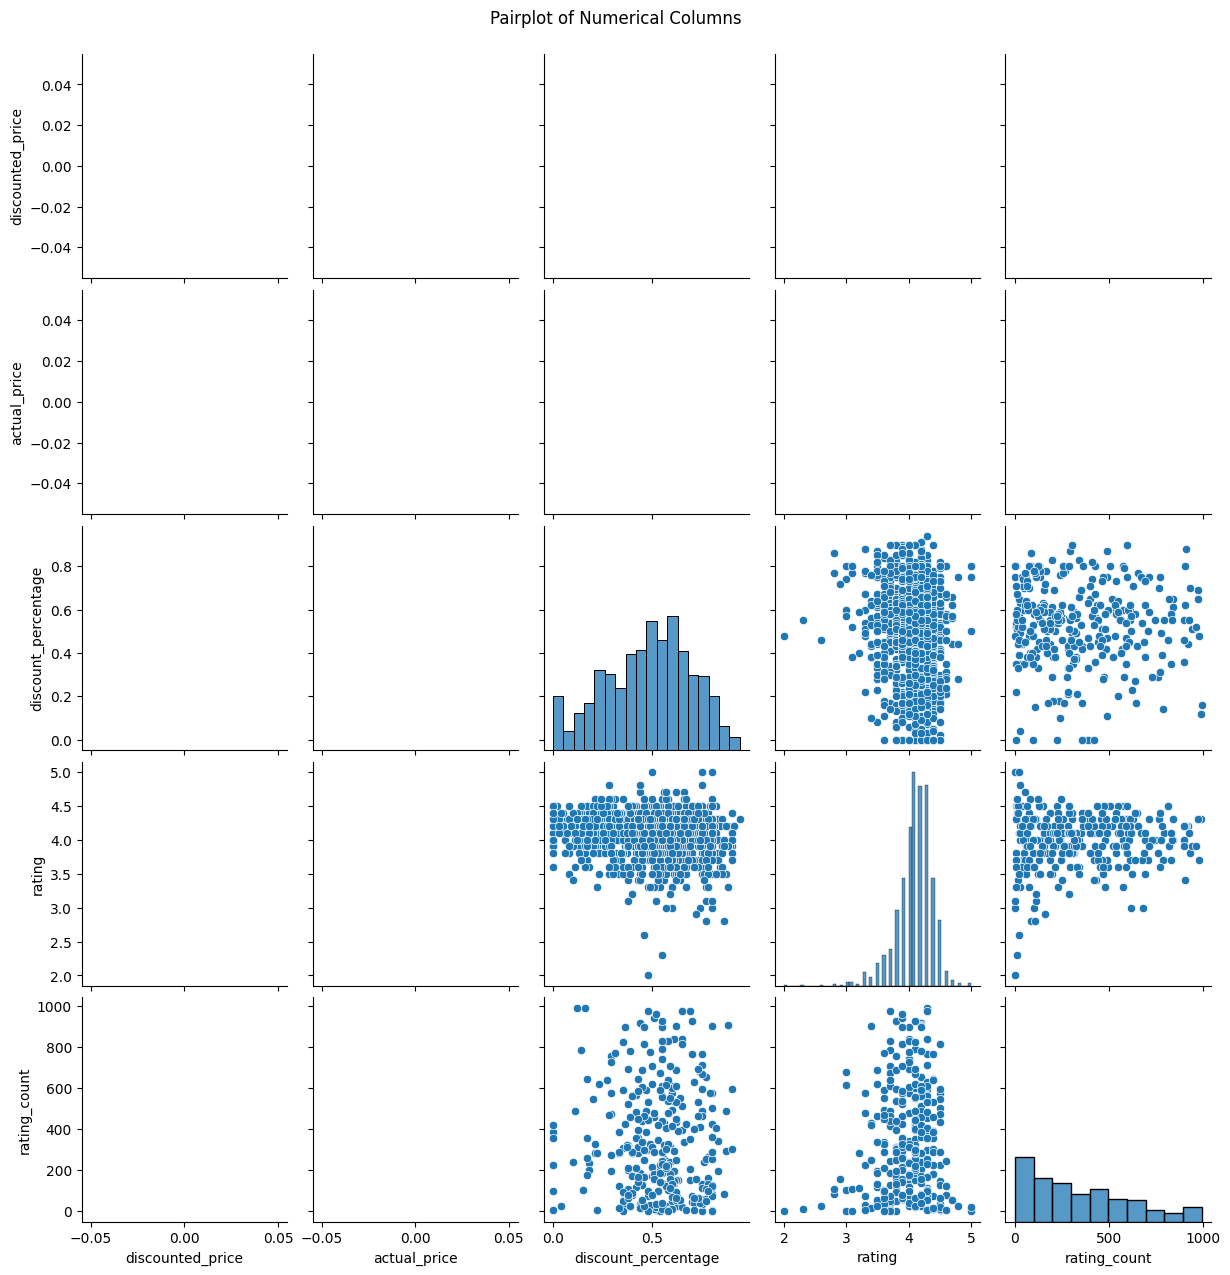

In [28]:
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5944\114342800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


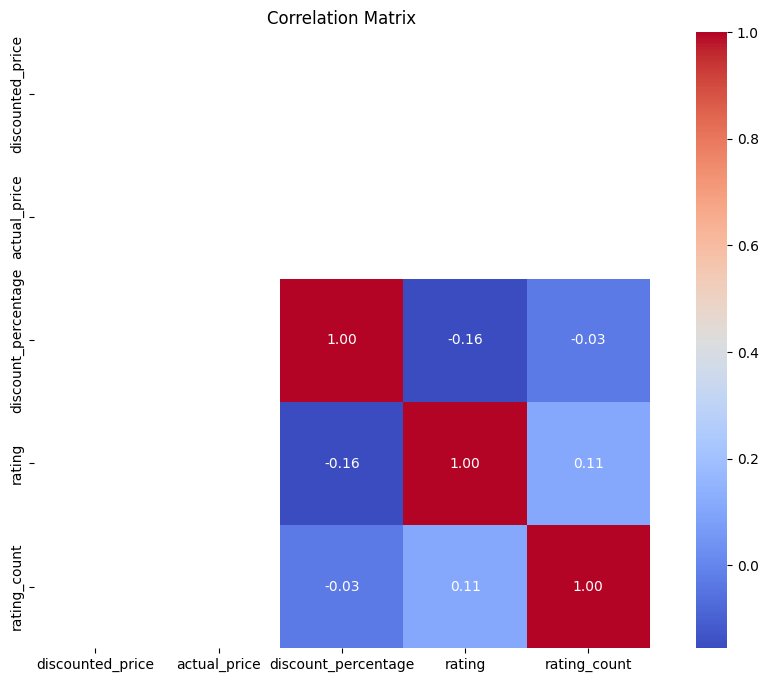

In [29]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


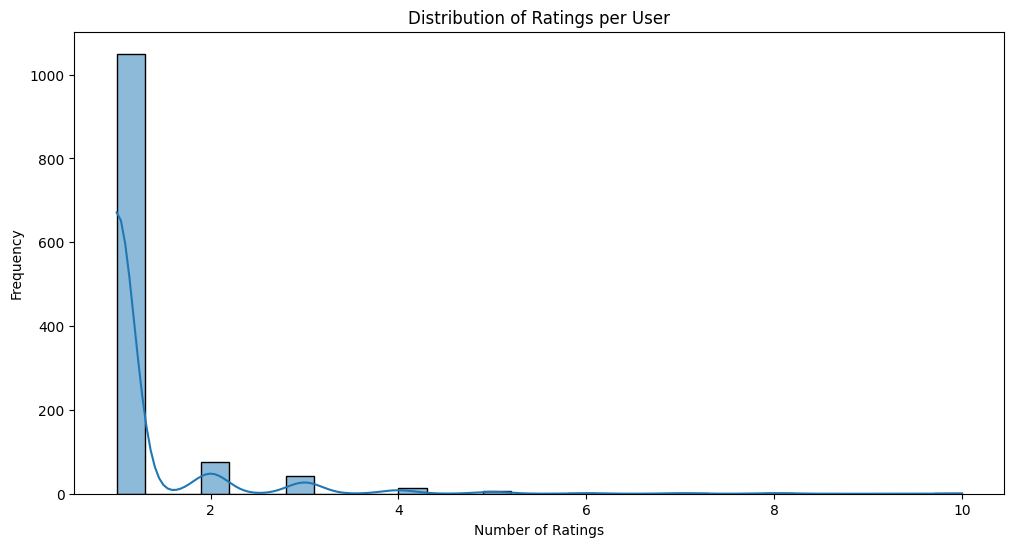

In [31]:
plt.figure(figsize=(12, 6))
user_rating_counts = df['user_id'].value_counts()
sns.histplot(user_rating_counts, bins=30, kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_5944\263774570.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensures that labels are within figure bounds


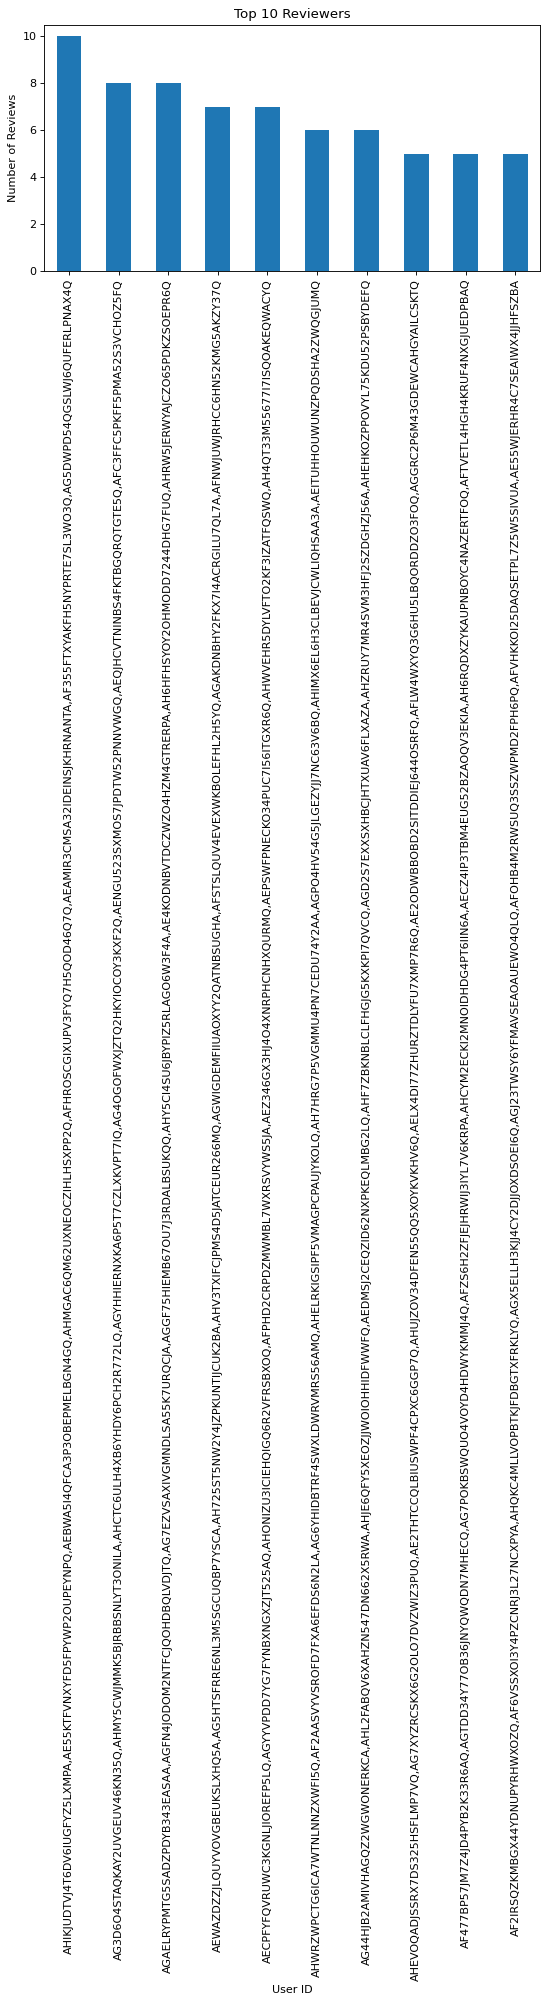

9686

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import gc

# Limiting Data Size
top_reviewers = df['user_id'].value_counts().head(10)

# Adjusted Plotting with Lower Figure Resolution
plt.figure(figsize=(8, 4), dpi=80)  # Reducing figure size and resolution
top_reviewers.plot(kind='bar')
plt.title('Top 10 Reviewers')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensures that labels are within figure bounds
plt.show()

# Free up memory
del top_reviewers
gc.collect()



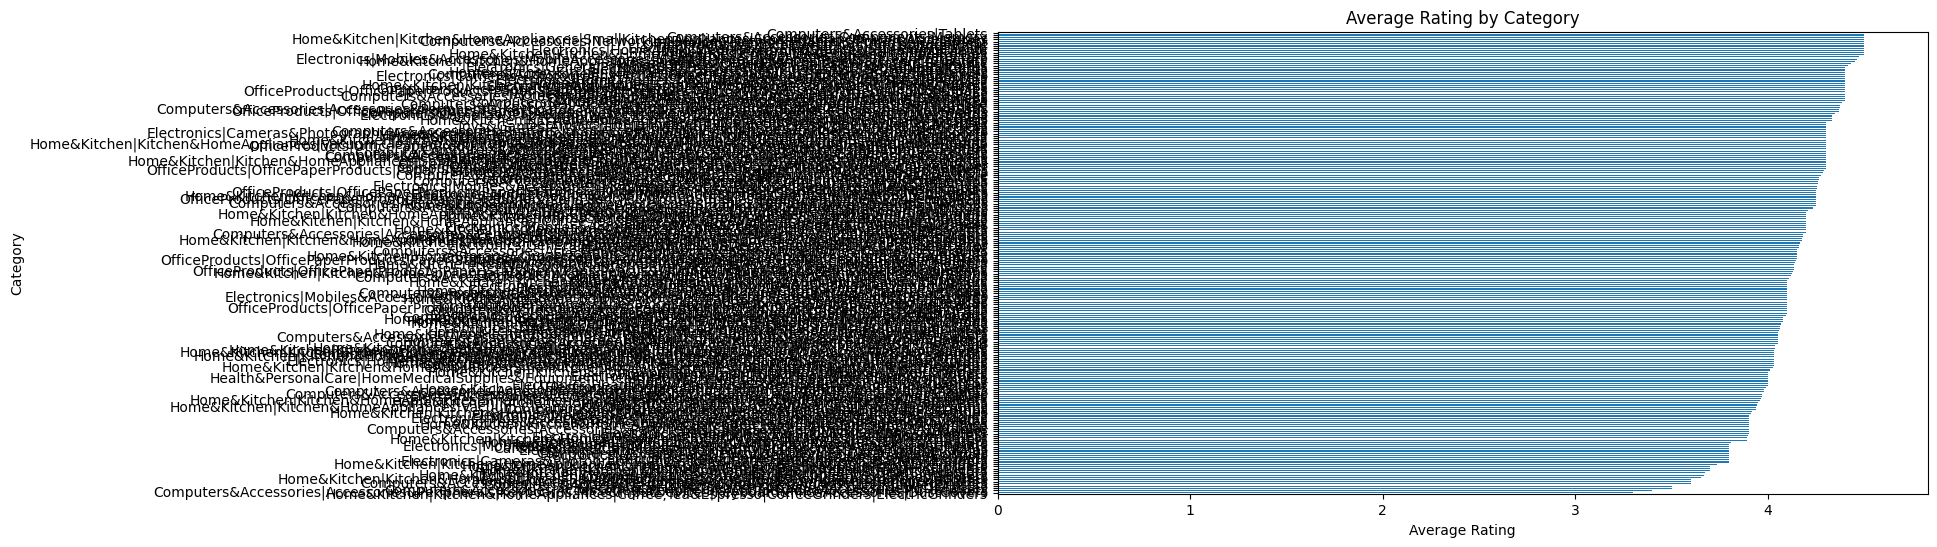

In [35]:
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_rating_by_category.plot(kind='barh')
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


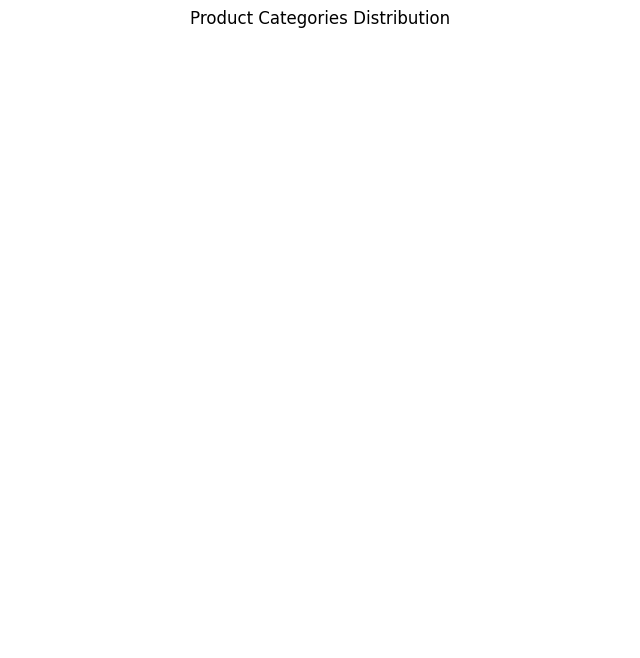

In [39]:
plt.figure(figsize=(8, 8))
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Categories Distribution')
plt.axis('equal')
plt.show()



C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


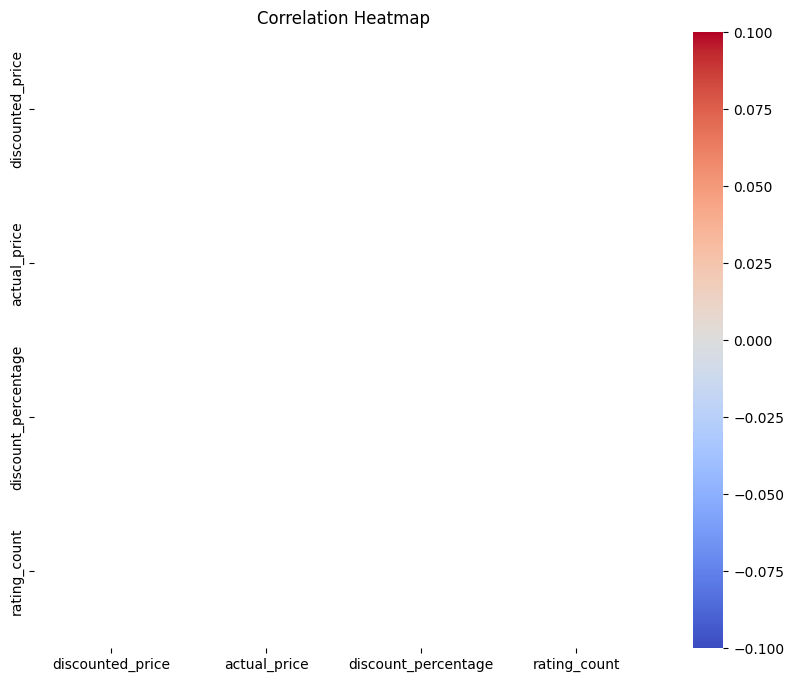

In [44]:
# Convert relevant columns to numeric
numeric_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


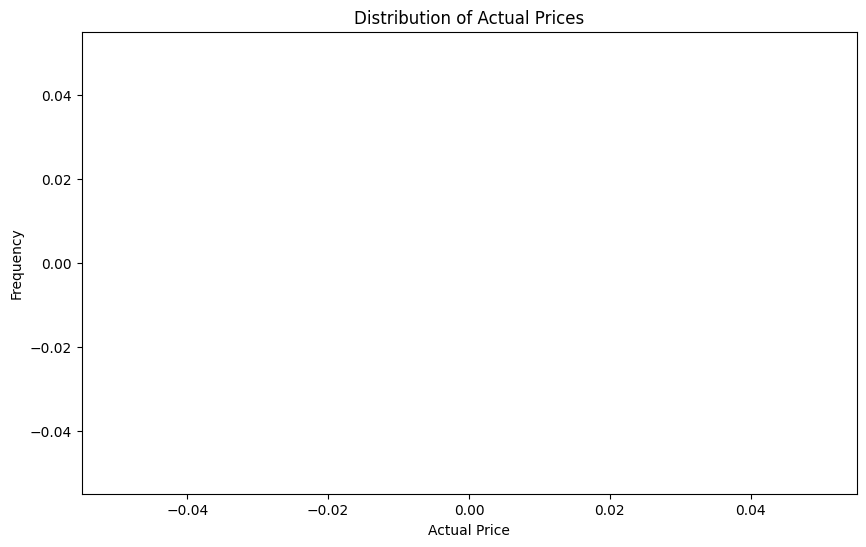

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()



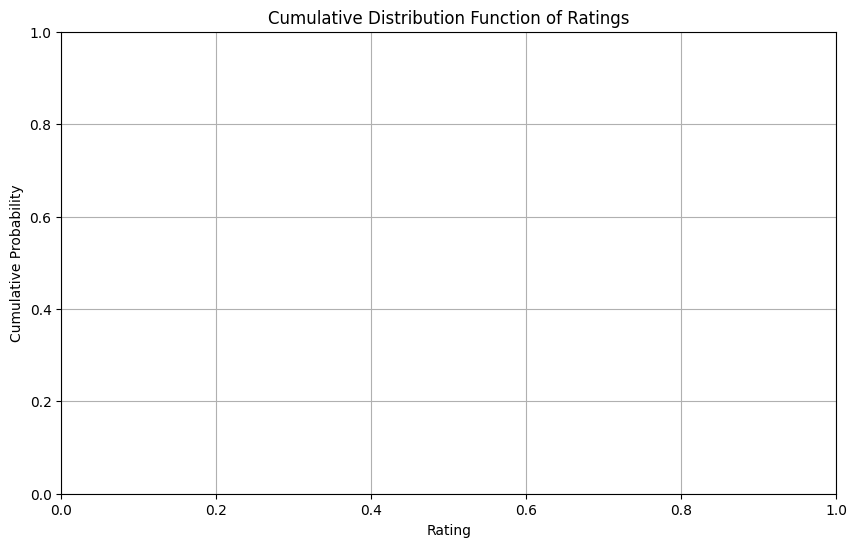

In [53]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='rating')
plt.title('Cumulative Distribution Function of Ratings')
plt.xlabel('Rating')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()






In [59]:
# Check for NaN values
print(df['discount_percentage'].isna().sum())
print(df['actual_price'].isna().sum())

# Check for infinite values
print(np.isinf(df['discount_percentage']).sum())
print(np.isinf(df['actual_price']).sum())



0
0
0
0


In [60]:
# Remove rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
df = df.dropna(subset=['discount_percentage', 'actual_price'])  # Drop rows with NaN in these columns


In [61]:
# Fill NaN values with 0 or any other value
df['discount_percentage'].fillna(0, inplace=True)
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)  # Example: fill with mean price


In [62]:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
